In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import files
files_upload = files.upload()

Saving train-chennai-sale - train-chennai-sale.csv to train-chennai-sale - train-chennai-sale.csv


In [ ]:
df = pd.read_csv('train-chennai-sale - train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
print(df.columns)
print('The total number of features:',df.shape[1])

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')
The total number of features: 22


In [ ]:
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [ ]:
df.tail(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7099,P03828,Adyar,895,05-01-2011,197,1.0,1.0,3,AdjLand,Yes,...,NoSewr,No Access,I,3.6,4.7,4.2,4.12,250641,7372,7371800
7100,P05438,T Nagar,1733,24-02-2010,191,1.0,1.0,4,AbNormal,Yes,...,NoSeWa,No Access,RL,3.4,3.7,2.1,2.89,702058,312026,19501600
7101,P05042,Karapakkam,666,11-05-2010,51,1.0,1.0,2,AdjLand,Yes,...,ELO,Gravel,I,3.2,4.4,2.5,3.28,273317,74541,6211750
7102,P05560,Karapakkam,701,03-02-2010,100,1.0,1.0,2,AbNormal,No,...,NoSeWa,Gravel,RH,4.2,3.0,2.0,2.96,282175,141088,5643500
7103,P05133,Karapakkam,1462,23-04-2010,68,2.0,2.0,4,Family,No,...,NoSeWa,Gravel,RM,2.7,3.3,3.6,3.24,356716,178358,9387250
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,...,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7109.0,1.382073e+03,4.574109e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7109.0,9.960318e+01,5.740311e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7104.0,1.213260e+00,4.096387e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7109.0,3.688704e+00,1.019099e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7109.0,3.517471e+00,8.919724e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7109.0,3.507244e+00,8.978337e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7109.0,3.485300e+00,8.872664e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7061.0,3.503254e+00,5.272229e-01,2.0,3.13,3.5,3.89,4.97
REG_FEE,7109.0,3.769383e+05,1.430707e+05,71177.0,272406.00,349486.0,451562.00,983922.00


# **DROPPING UNWANTED FEATURES.**

In [ ]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)


In [ ]:
print("Total number of features in the data is:",df.shape[1])
pd.DataFrame(df.dtypes.value_counts()).T

Total number of features in the data is: 19


,object,float64,int64
0,9,6,4


In [ ]:
categorical_features = [x for x in df.columns 
                if not (df[x].dtype == np.float64 
                        or df[x].dtype == np.int64)]
print(categorical_features)

['AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [ ]:
numerical_features=[x for x in df.columns if df[x].dtype==np.int64 or df[x].dtype==np.float64]
print(numerical_features)

['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE']


In [ ]:
print('The data has {} categorical features'.format(len(categorical_features)))
print('The data has {} numerical_features'.format(len(numerical_features)))

The data has 9 categorical features
The data has 10 numerical_features


In [ ]:
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0


# **FILLING THE NULL VALUES**

In [ ]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

df['N_BEDROOM'] = np.floor(df['N_BEDROOM'])
df['N_BATHROOM'] = np.floor(df['N_BATHROOM'])

In [ ]:
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **SPELLING CORRECTIONS**

In [ ]:
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

In [ ]:
# pd.DataFrame(df.isnull().sum()).T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

# **CREATING NEW FEATURES FOR DATE_SALE & DATE_BUILD**

In [ ]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
pd.DataFrame(df.dtypes.value_counts()).T

,object,float64,int64,datetime64[ns]
0,7,6,4,2


In [ ]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year

In [ ]:
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']

# DATA VISUALISATION.

In [ ]:
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

# DISTRIBUTION OF THE DATA.

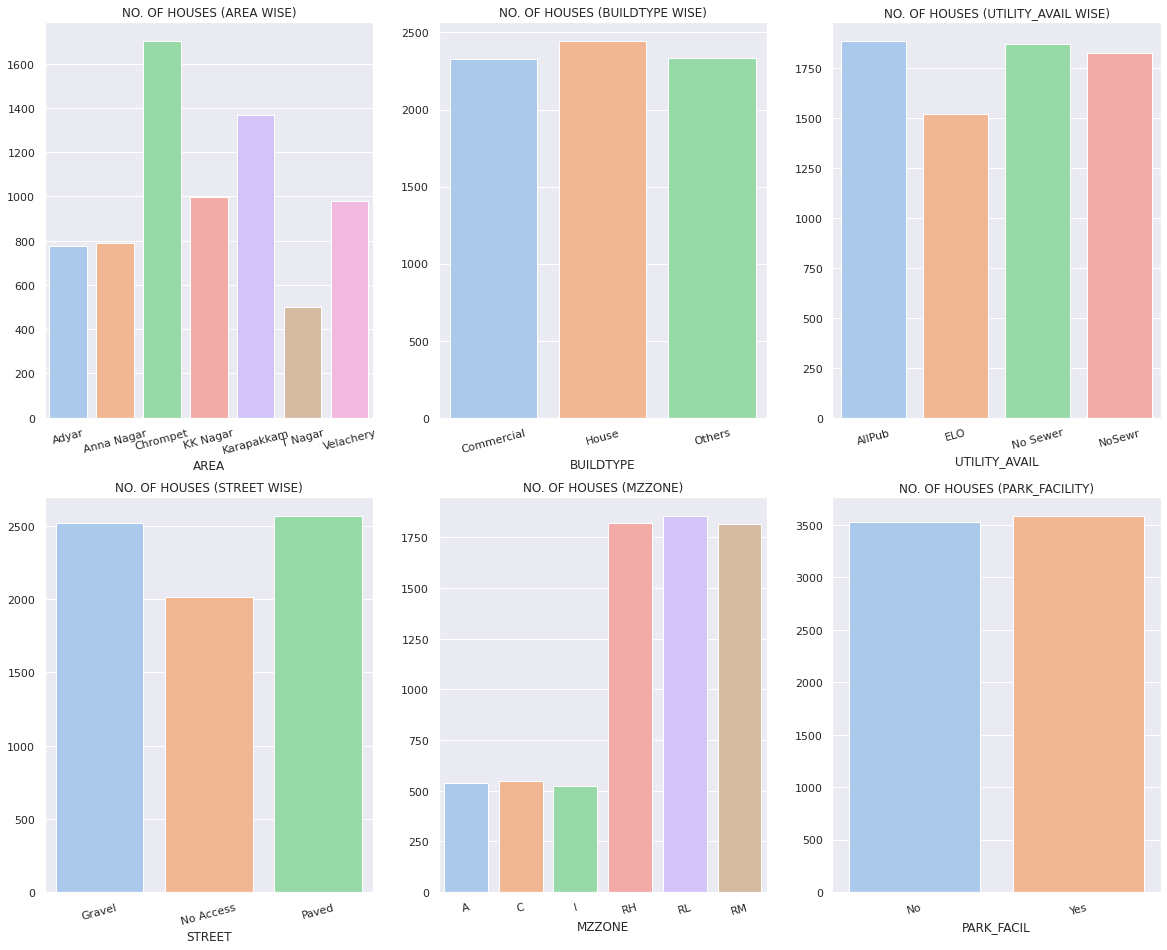

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

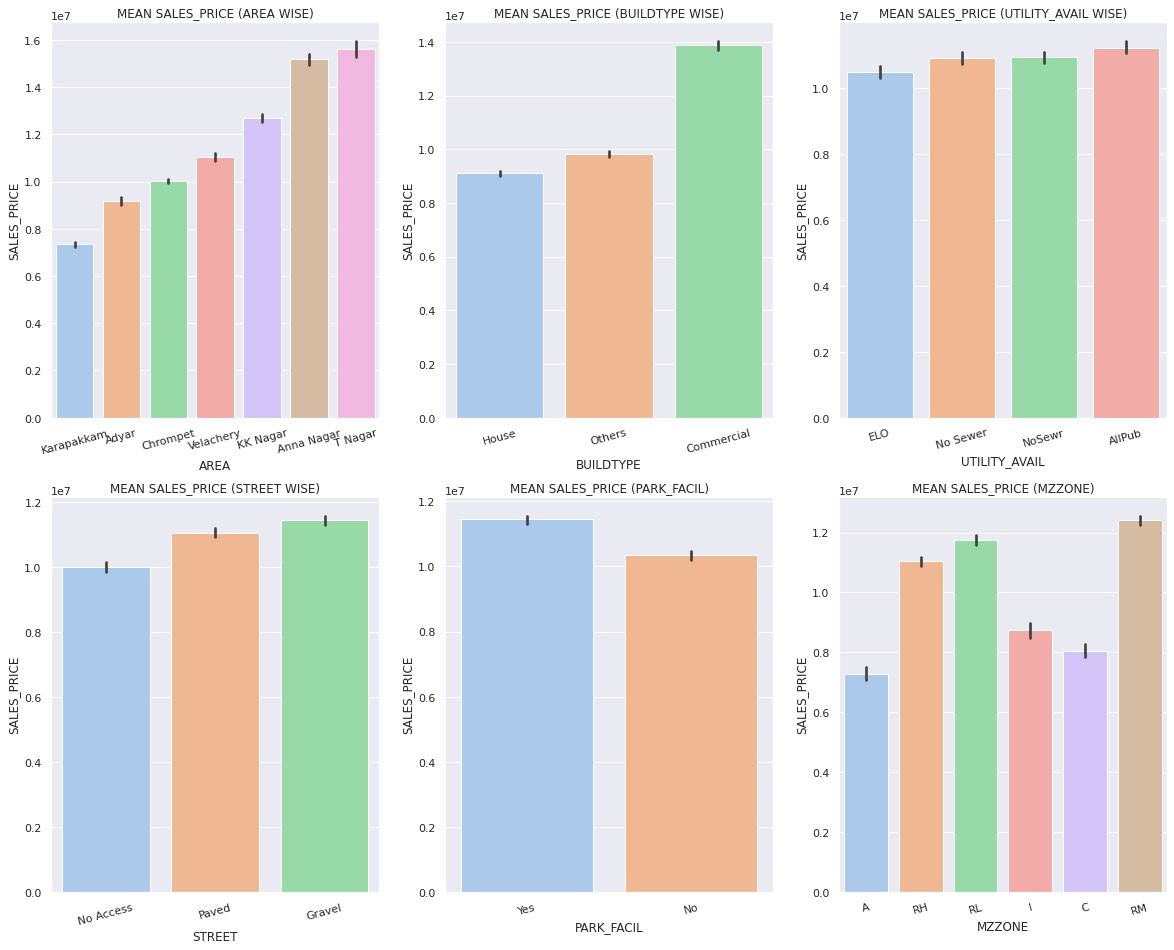

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

In [ ]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'BUILD_YEAR',
       'SALE_YEAR', 'SOLD_AGE'],
      dtype='object')

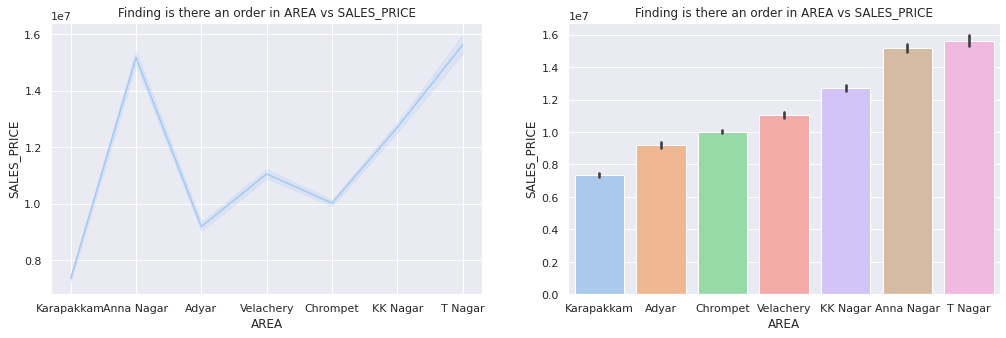

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['AREA'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

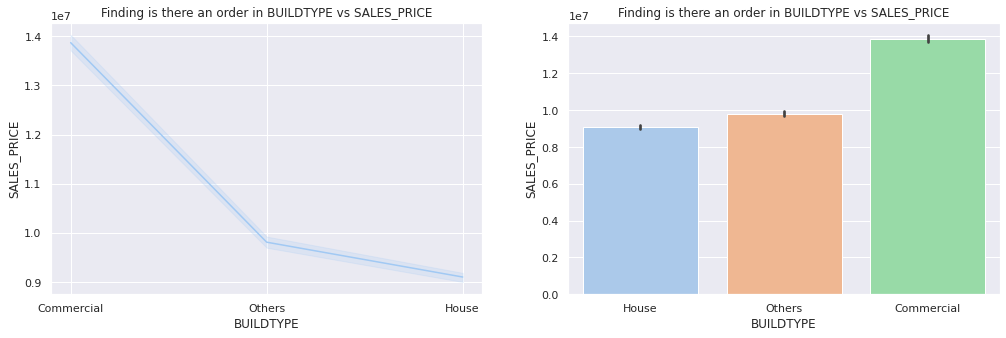

In [ ]:
plt.figure(figsize=(17,5))
plt.subplot(121)
sns.lineplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('Finding is there an order in BUILDTYPE vs SALES_PRICE')
plt.show()

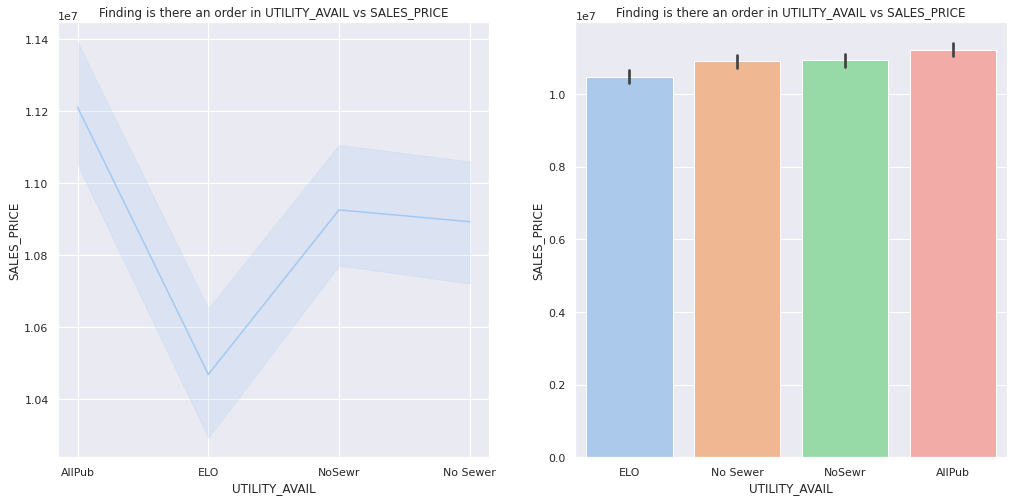

In [ ]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Finding is there an order in UTILITY_AVAIL vs SALES_PRICE')
plt.show()

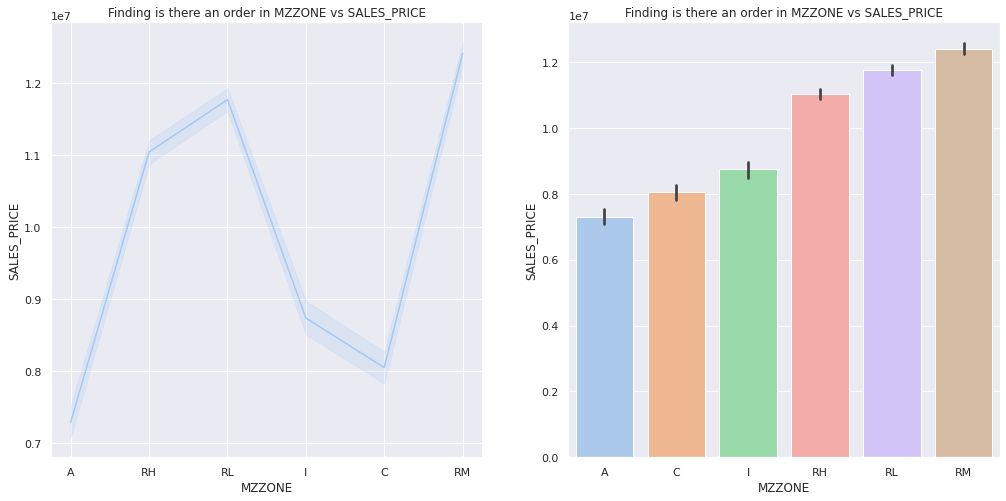

In [ ]:
plt.figure(figsize=(17,8))
plt.subplot(121)
sns.lineplot(x=df['MZZONE'],y=df['SALES_PRICE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.subplot(122)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Finding is there an order in MZZONE vs SALES_PRICE')
plt.show()

# **REALTION WITH TARGET VARIABLE**

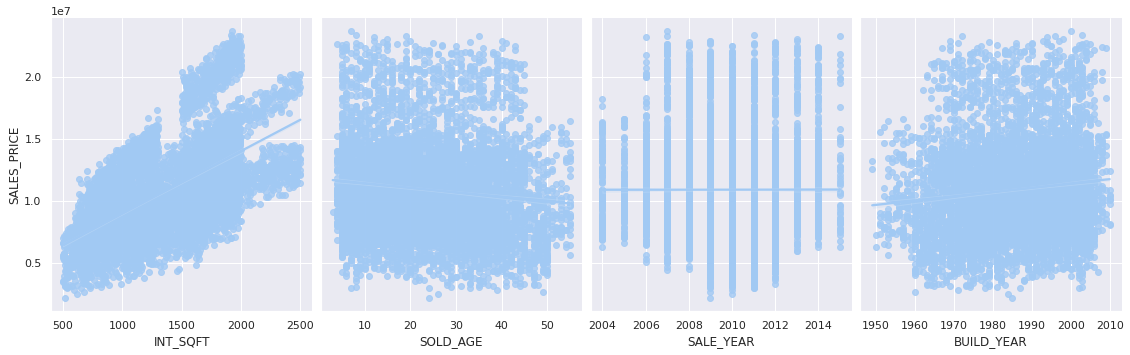

In [ ]:
sns.pairplot(df,x_vars=["INT_SQFT", "SOLD_AGE","SALE_YEAR","BUILD_YEAR"], y_vars=["SALES_PRICE"],
             height=5,aspect=.8, kind="reg")
plt.show()

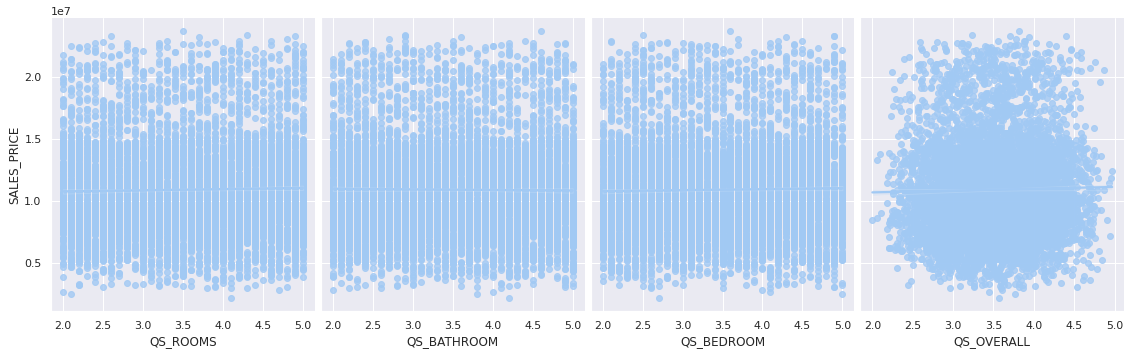

In [ ]:
sns.pairplot(df,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

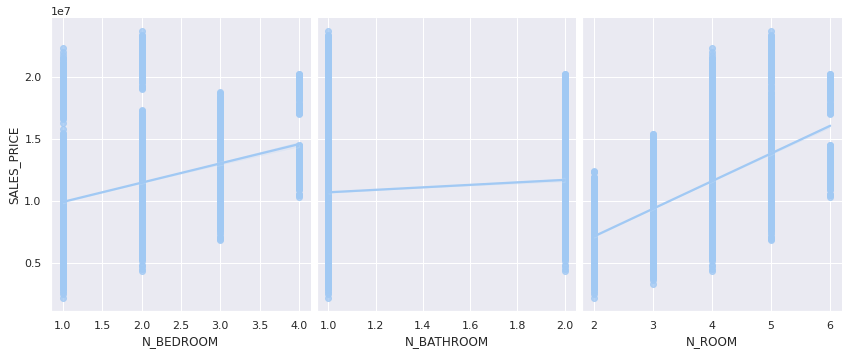

In [ ]:
sns.pairplot(df,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM"], y_vars=["SALES_PRICE"],
             height=5, aspect=.8, kind="reg")
plt.show()

In [ ]:
#BUILDTYPE WISE MIN.AVG.MAX Sales_Prices:-
buildtype_fltr_C = df['BUILDTYPE']=='Commercial'
commercial=df.loc[buildtype_fltr_C]
min = commercial['SALES_PRICE'].min()
mean= commercial['SALES_PRICE'].mean()
median = commercial['SALES_PRICE'].median()
max = commercial['SALES_PRICE'].max()
index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']
comm = pd.DataFrame([min,mean,median,max],columns=['Commercial'],index=index)

buildtype_fltr_H = df['BUILDTYPE']=='House'
House=df.loc[buildtype_fltr_H]
min = House['SALES_PRICE'].min()
mean= House['SALES_PRICE'].mean()
median = House['SALES_PRICE'].median()
max = House['SALES_PRICE'].max()
house = pd.DataFrame([min,mean,median,max],columns=['House'],index=index)

buildtype_fltr_O = df['BUILDTYPE']=='Others'
Others=df.loc[buildtype_fltr_O]
min = Others['SALES_PRICE'].min()
mean= Others['SALES_PRICE'].mean()
median = Others['SALES_PRICE'].median()
max = Others['SALES_PRICE'].max()
others = pd.DataFrame([min,mean,median,max],columns=['Others'],index=index)

Build_type_mmm = pd.concat([comm,house,others],axis=1)
Build_type_mmm = pd.DataFrame(Build_type_mmm.T)
Build_type_mmm["Build_type"]=["Commercial","House","Others"]

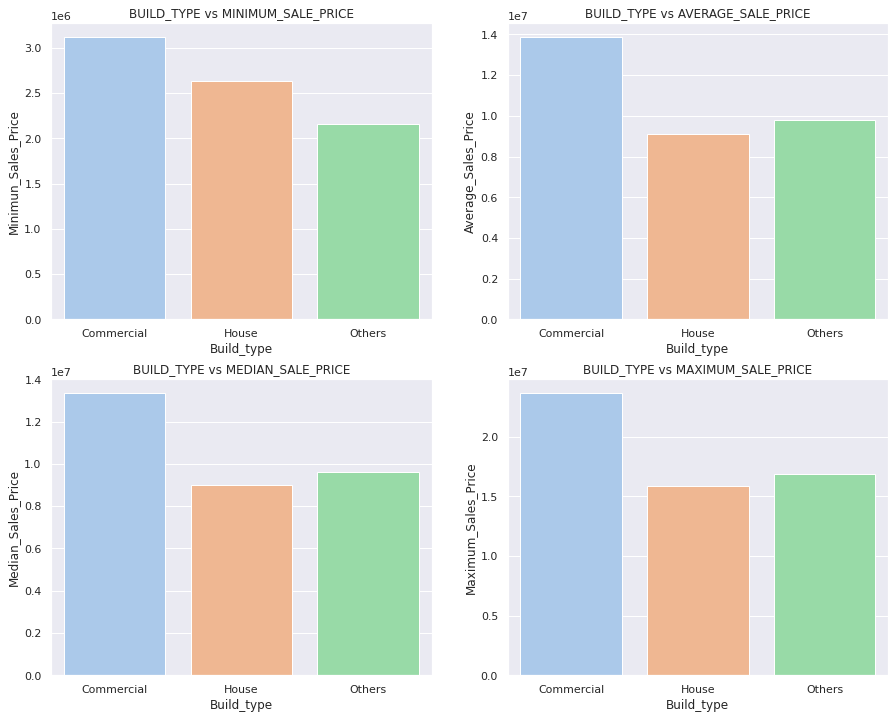

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.barplot(x="Build_type",y="Minimun_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x="Build_type",y="Average_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x="Build_type",y="Median_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x="Build_type",y="Maximum_Sales_Price",data=Build_type_mmm)
plt.title('BUILD_TYPE vs MAXIMUM_SALE_PRICE')
plt.show()

In [ ]:

#AREA WISE MIN.AVG.MAX Sales_Prices:-
mean=df.groupby('AREA')['SALES_PRICE'].mean()
mean_=mean.values
max=df.groupby('AREA')['SALES_PRICE'].max()
max_=max.values
min=df.groupby('AREA')['SALES_PRICE'].min()
min_=min.values
median=df.groupby('AREA')['SALES_PRICE'].median()
median_=min.values
Area_mmm=pd.DataFrame([min_,mean_,median_,max_],columns=mean.index,index=['Minimun_Sales_Price','Average_Sales_Price','Median_Sales_Price','Maximum_Sales_Price']).T
Area_mmm["AREA"]=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

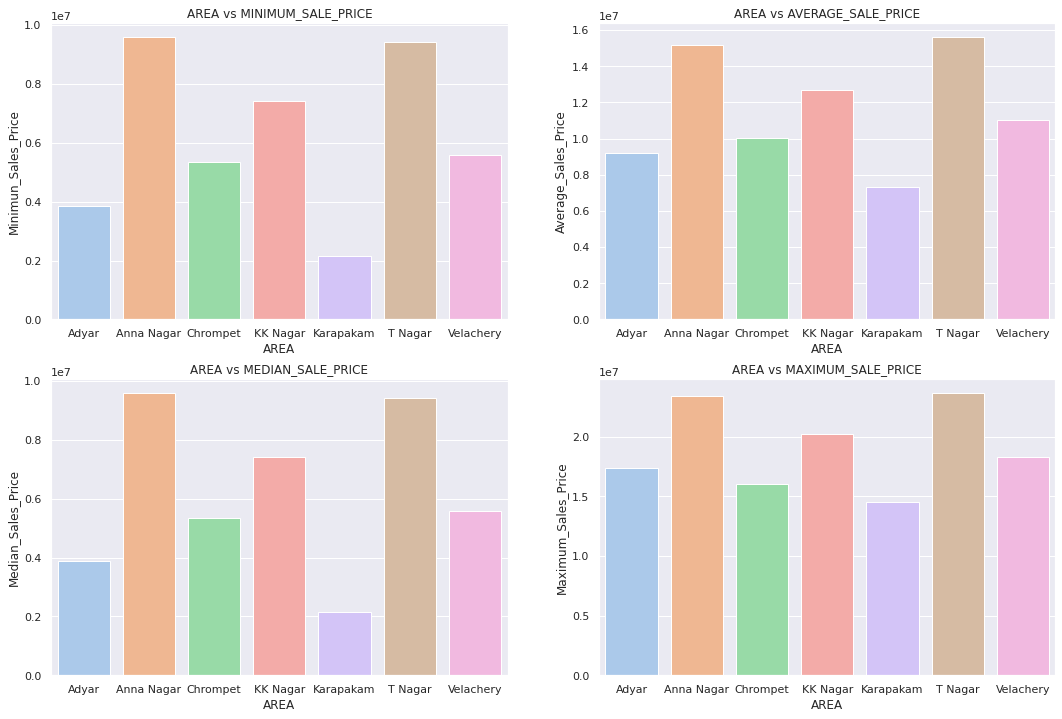

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(221)
sns.barplot(x='AREA',y='Minimun_Sales_Price',data=Area_mmm)
plt.title('AREA vs MINIMUM_SALE_PRICE')
plt.subplot(222)
sns.barplot(x='AREA',y='Average_Sales_Price',data=Area_mmm)
plt.title('AREA vs AVERAGE_SALE_PRICE')
plt.subplot(223)
sns.barplot(x='AREA',y='Median_Sales_Price',data=Area_mmm)
plt.title('AREA vs MEDIAN_SALE_PRICE')
plt.subplot(224)
sns.barplot(x='AREA',y='Maximum_Sales_Price',data=Area_mmm)
plt.title('AREA vs MAXIMUM_SALE_PRICE')
plt.show()

In [45]:
mean=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(df[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())

In [46]:
mmm_df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
mmm__df = pd.DataFrame(mmm_df)
mmm__df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
mmm__df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
mmm__df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T Nagar","Velachery"]

# **RESPECTIVE WITH MINIMUM PRICE OF EACH AREA.**

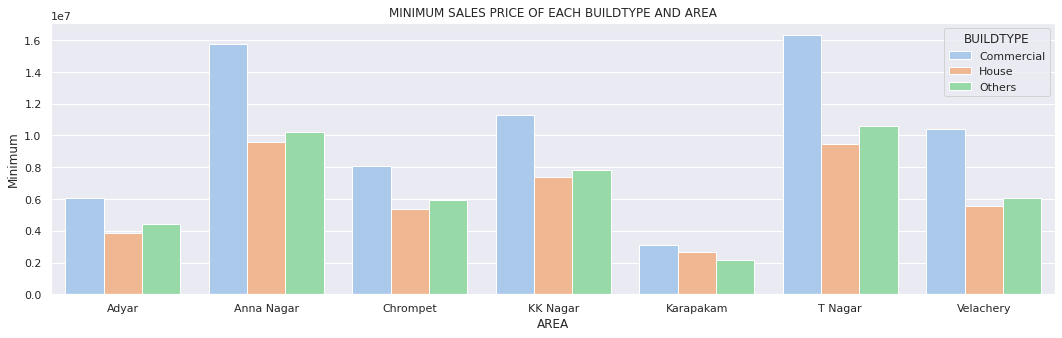

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Minimum',data=mmm__df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

# **RESPECTIVE WITH AVERAGE PRICE OF EACH AREA**

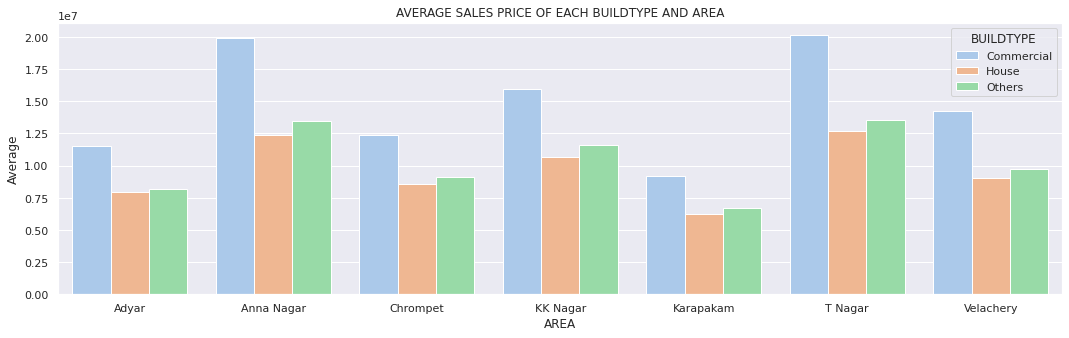

In [47]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Average',data=mmm__df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

# **RESPECTIVE WITH MAXIMUM PRICE OF EACH AREA.**

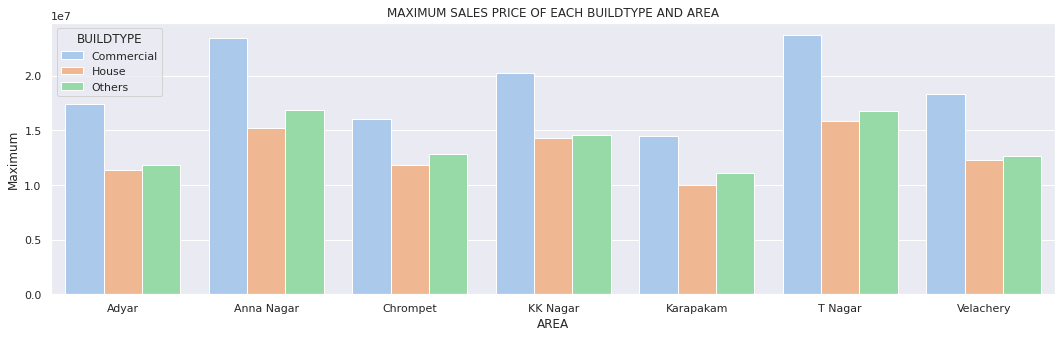

In [48]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Maximum',data=mmm__df,hue='BUILDTYPE')
plt.title('MAXIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

## **ENCODING THE CATEGORICAL FEATURES.**

In [49]:
df.head(20)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330000,7600000,1967,2011,44
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765000,21717770,1995,2006,11
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090000,13159200,1992,2012,20
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010000,9630290,1988,2010,22
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290000,7406250,1979,2009,30
5,Chrompet,1220,2014-11-09,36,2.0,1.0,4,Partial,No,2009-12-09,...,No Access,RH,4.5,2.6,3.1,3.320000,12394750,2009,2014,5
6,Chrompet,1167,2007-05-04,137,1.0,1.0,3,Partial,No,1979-12-04,...,No Access,RL,3.6,2.1,2.5,2.670000,8488790,1979,2007,28
7,Velachery,1847,2006-03-13,176,3.0,2.0,5,Family,No,1996-03-15,...,Gravel,RM,2.4,4.5,2.1,3.260000,16800250,1996,2006,10
8,Chrompet,771,2011-06-04,175,1.0,1.0,2,AdjLand,No,1977-04-14,...,Paved,RM,2.9,3.7,4.0,3.550000,8308970,1977,2011,34
9,Velachery,1635,2006-06-22,74,2.0,1.0,4,AbNormal,No,1991-06-26,...,No Access,I,3.1,3.1,3.3,3.160000,8083650,1991,2006,15


In [50]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64,datetime64[ns]
0,7,7,6,2


In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
df['AREA']=le.fit_transform(df['AREA'])

In [53]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILD_YEAR,SALE_YEAR,SOLD_AGE
0,4,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,...,Paved,A,4.0,3.9,4.9,4.330,7600000,1967,2011,44
1,1,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,...,Gravel,RH,4.9,4.2,2.5,3.765,21717770,1995,2006,11
2,0,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,...,Gravel,RL,4.1,3.8,2.2,3.090,13159200,1992,2012,20
3,6,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,...,Paved,I,4.7,3.9,3.6,4.010,9630290,1988,2010,22
4,4,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,...,Gravel,C,3.0,2.5,4.1,3.290,7406250,1979,2009,30


# **FEATURE IMPORTANCE**

# **CORRELATION WITHIN THE FEATURES**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr

In [55]:
X=df.drop(['INT_SQFT','AREA'],axis=1)
y=df['INT_SQFT']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 20), (1422, 20), (5687,), (1422,))

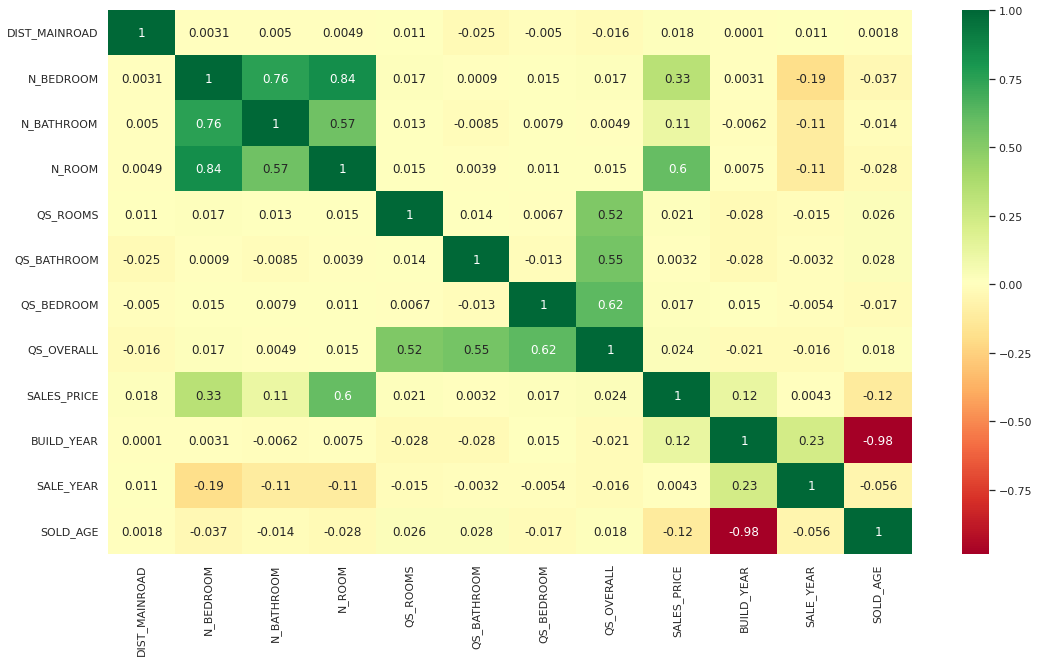

In [61]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

In [62]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are use absolute() to even focus on -ve coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))
print('This column are highly correlated with another column:',corr_features)

This column are highly correlated with another column: {'SOLD_AGE', 'N_ROOM'}


In [64]:
cwf_train=X_train.drop(corr_features,axis=1)
cwf_test=X_test.drop(corr_features,axis=1)

In [65]:
cwf_train.shape
# y_train.shape

(5687, 18)

In [67]:
train = pd.concat([cwf_train,y_train],axis=1)
test = pd.concat([cwf_test,y_test],axis=1)

In [68]:
new_df=pd.concat([train,test],axis=0)
new_df.shape
print("PREVIOUSLY THE NO. OF FEATURE IS:",df.shape)
print("NOW THE NO. OF FEATURE IS:",new_df.shape)
print("{} FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE".format(df.shape[1]-new_df.shape[1]))

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 22)
NOW THE NO. OF FEATURE IS: (7109, 19)
3 FEATURE IS BEEN REDUCED AFTER CORRELATION WITHIN INDEPENDENT FEATURES INCLUDING INF_PRICE


In [90]:
reg = LinearRegression()

In [ ]:
new_df.head(2)

,INT_SQFT
0,1004
1,1986


# **VARIANCE INFLATION FACTOR**

In [ ]:
X=new_df.drop(['INT_SQFT'],axis=1)
y=new_df['INT_SQFT']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 0), (1422, 0), (5687,), (1422,))

# **MACHINE LEARNING MODEL**

In [ ]:
df=new_df

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
scaler=StandardScaler()
minmax=MinMaxScaler()

In [ ]:
X=new_df.drop('INT_SQFT',axis=1)
y=df['INT_SQFT']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 0), (1422, 0), (5687,), (1422,))

# **WITH CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
import xgboost as xg
# xg_model = XGBRegressor()
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                ) 
rf = RandomForestRegressor(n_estimators= 1000, max_depth = 4, max_features='sqrt')

In [ ]:
print("The cross_validation score of an Linear_Regression model is:",CV_Linear_regression)
print("The cross_validation score of an XG_Boost model is:",CV_XG_Boost)
print("The cross_validation score of an Random_Forest model is:",CV_RandomForest)

The cross_validation score of an Linear_Regression model is: nan
The cross_validation score of an XG_Boost model is: nan
The cross_validation score of an Random_Forest model is: nan
